# NLP and Reddit Subcommunities - EDA and Cleaning
---

In this notebook, we will be exploring and visualizing the data pulled via PRAW API on our two Reddit subcommunities. We will look into variables such as post length, word count, number of upvotes, number of comments, and will utilize CountVectorizer to see the top words within and between communities. We will manipulate variables and do any associated cleaning as necessary. For more information on the data pull and initial data cleaning, see the [initial notebook](../code/01_EDA_and_Cleaning.ipynb) of this analysis. For model-building, see the [third notebook](../code/03_Model_Building.ipynb) iterating across various models to find which ones are best at predicting the origin of a post, as well as impactful features.

For more information on the background, a summary of methods, and findings, please see the associated [README](../Farah_Malik_Proj2_README.md) for this analysis.

### Contents:
- [I. Observe Variables for Normality](#I.-Observe-Variables-for-Normality)
    - [Summarizing the Distribution of Our Target Variable](#Summarizing-the-Distribution-of-Our-Target-Variable)
    - [Assess Skewedness of Certain Variables](#Assess-Skewedness-of-Certain-Variables)
- [II. Feature Engineering](#II.-Feature-Engineering)
    - [Manipulating Categorical Variables and One Hot Encoding](#Manipulating-Categorical-Variables-and-One-Hot-Encoding)
        - [Basement Predictors](#Basement-Predictors)
        - [Garage Predictors](#Garage-Predictors)
        - [Fireplace Predictors](#Fireplace-Predictors)
        - [Kitchen Predictors](#Kitchen-Predictors)
        - [Extra Features/Amenities Predictors](#Extra-Features/Amenities-Predictors)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

In [2]:
import os
os.getcwd()

'C:\\Users\\farah\\Documents\\General Assembly DSI\\DSI-508\\Projects\\project-3\\code'

In [3]:
df1 = pd.read_csv('../data/Clean/snow_ski.csv')

In [4]:
df = df1.drop(columns=['selftext', 'title'])

In [5]:
# Distribution of Communities
df.subreddit.value_counts()

skiing               2887
snowboardingnoobs    2752
Name: subreddit, dtype: int64

In [6]:
df.subreddit.value_counts(normalize=True)

skiing               0.51197
snowboardingnoobs    0.48803
Name: subreddit, dtype: float64

In [7]:
df.dtypes

created_utc     float64
author           object
score             int64
upvote_ratio    float64
num_comments      int64
subreddit        object
text             object
lem_text         object
stem_text        object
dtype: object

In [8]:
df.shape

(5639, 9)

In [9]:
df.head().append(df.tail())

C:\Users\farah\AppData\Local\Temp\ipykernel_26488\3069207714.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.head().append(df.tail())


,created_utc,author,score,upvote_ratio,num_comments,subreddit,text,lem_text,stem_text
0,1.686703e+09,dea_ton,0,0.50,1,snowboardingnoobs,my buddy’s new display,my buddy s new display,my buddi s new display
1,1.686690e+09,Kerlebsky,3,0.80,13,snowboardingnoobs,what do i do about a chip like this?,what do i do about a chip like this,what do i do about a chip like thi
2,1.686681e+09,adknkd,3,1.00,2,snowboardingnoobs,"rome katana v bataleon astro asym? a post on snowboardingforum said these were comparable but i'm wondering the differences are. i have the vice but i'd like to pick up a second pair of bindings a bit stiffer for my second board, and bataleon and rome both have sales going...rome has the cleaver (katana is sold out), and bataleon has the astro asym. if the astro asym is basically a katana clon...",rome katana v bataleon astro asym a post on snowboardingforum said these were comparable but i m wondering the difference are i have the vice but i d like to pick up a second pair of binding a bit stiffer for my second board and bataleon and rome both have sale going rome ha the cleaver katana is sold out and bataleon ha the astro asym if the astro asym is basically a katana clone i m okay wit...,rome katana v bataleon astro asym a post on snowboardingforum said these were compar but i m wonder the differ are i have the vice but i d like to pick up a second pair of bind a bit stiffer for my second board and bataleon and rome both have sale go rome ha the cleaver katana is sold out and bataleon ha the astro asym if the astro asym is basic a katana clone i m okay with it but if it s not ...
3,1.686675e+09,Alarmed_Cranberry313,5,1.00,15,snowboardingnoobs,how to stop boots from smelling (no dry rack) im about to go to my seasonal job at a snow resort and last year i had bad problems with boot smells can anyone recommend a spray or something i can’t afford a dry rack atmthanks.,how to stop boot from smelling no dry rack im about to go to my seasonal job at a snow resort and last year i had bad problem with boot smell can anyone recommend a spray or something i can t afford a dry rack atmthanks,how to stop boot from smell no dri rack im about to go to my season job at a snow resort and last year i had bad problem with boot smell can anyon recommend a spray or someth i can t afford a dri rack atmthank
4,1.686640e+09,th04r_,3,0.81,5,snowboardingnoobs,"lamar whisper? hi all! i recently picked up a used lamar whisper off craigslist for super cheap, but i really don’t know anything about the board lol. this is the only other one i can find onlinehttps://www.playitagainsports.com/product/grand-junction-co/11762-s000036806/used-lamar-whisper-144-cm-boys-snowboards can anyone tell me if it’s a decent brand/ quality and what the board is good/ bad...",lamar whisper hi all i recently picked up a used lamar whisper off craigslist for super cheap but i really don t know anything about the board lol this is the only other one i can find onlinehttps www playitagainsports com product grand junction co 11762 s000036806 used lamar whisper 144 cm boy snowboard can anyone tell me if it s a decent brand quality and what the board is good bad at i also...,lamar whisper hi all i recent pick up a use lamar whisper off craigslist for super cheap but i realli don t know anyth about the board lol thi is the onli other one i can find onlinehttp www playitagainsport com product grand junction co 11762 s000036806 use lamar whisper 144 cm boy snowboard can anyon tell me if it s a decent brand qualiti and what the board is good bad at i also haven t been...
5634,1.673959e+09,bNasTy-v1,4,0.58,1,skiing,"he pizzaed, when he should have french fried",he pizzaed when he should have french fried,he pizza when he should have french fri
5635,1.673367e+09,r0bski2,5,0.61,65,skiing,skiing group challenge ideas for a weeks’ trip needed i’ve organised a big group ski trip with people i work with (20 of us all aged 20-30). we did it last year with an almost completely differe

In [10]:
df['post_length'] = df['text'].apply(len)

In [11]:
def word_count(text):
    return len([i for i in text.split()])

df['post_word_count'] = df['text'].apply(word_count)

In [12]:
df.head()

,created_utc,author,score,upvote_ratio,num_comments,subreddit,text,lem_text,stem_text,post_length,post_word_count
0,1.686703e+09,dea_ton,0,0.50,1,snowboardingnoobs,my buddy’s new display,my buddy s new display,my buddi s new display,23,4
1,1.686690e+09,Kerlebsky,3,0.80,13,snowboardingnoobs,what do i do about a chip like this?,what do i do about a chip like this,what do i do about a chip like thi,37,9
2,1.686681e+09,adknkd,3,1.00,2,snowboardingnoobs,"rome katana v bataleon astro asym? a post on snowboardingforum said these were comparable but i'm wondering the differences are. i have the vice but i'd like to pick up a second pair of bindings a bit stiffer for my second board, and bataleon and rome both have sales going...rome has the cleaver (katana is sold out), and bataleon has the astro asym. if the astro asym is basically a katana clon...",rome katana v bataleon astro asym a post on snowboardingforum said these were comparable but i m wondering the difference are i have the vice but i d like to pick up a second pair of binding a bit stiffer for my second board and bataleon and rome both have sale going rome ha the cleaver katana is sold out and bataleon ha the astro asym if the astro asym is basically a katana clone i m okay wit...,rome katana v bataleon astro asym a post on snowboardingforum said these were compar but i m wonder the differ are i have the vice but i d like to pick up a second pair of bind a bit stiffer for my second board and bataleon and rome both have sale go rome ha the cleaver katana is sold out and bataleon ha the astro asym if the astro asym is basic a katana clone i m okay with it but if it s not ...,636,117
3,1.686675e+09,Alarmed_Cranberry313,5,1.00,15,snowboardingnoobs,how to stop boots from smelling (no dry rack) im about to go to my seasonal job at a snow resort and last year i had bad problems with boot smells can anyone recommend a spray or something i can’t afford a dry rack atmthanks.,how to stop boot from smelling no dry rack im about to go to my seasonal job at a snow resort and last year i had bad problem with boot smell can anyone recommend a spray or something i can t afford a dry rack atmthanks,how to stop boot from smell no dri rack im about to go to my season job at a snow resort and last year i had bad problem with boot smell can anyon recommend a spray or someth i can t afford a dri rack atmthank,225,45
4,1.686640e+09,th04r_,3,0.81,5,snowboardingnoobs,"lamar whisper? hi all! i recently picked up a used lamar whisper off craigslist for super cheap, but i really don’t know anything about the board lol. this is the only other one i can find onlinehttps://www.playitagainsports.com/product/grand-junction-co/11762-s000036806/used-lamar-whisper-144-cm-boys-snowboards can anyone tell me if it’s a decent brand/ quality and what the board is good/ bad...",lamar whisper hi all i recently picked up a used lamar whisper off craigslist for super cheap but i really don t know anything about the board lol this is the only other one i can find onlinehttps www playitagainsports com product grand junction co 11762 s000036806 used lamar whisper 144 cm boy snowboard can anyone tell me if it s a decent brand quality and what the board is good bad at i also...,lamar whisper hi all i recent pick up a use lamar whisper off craigslist for super cheap but i realli don t know anyth about the board lol thi is the onli other one i can find onlinehttp www playitagainsport com product grand junction co 11762 s000036806 use lamar whisper 144 cm boy snowboard can anyon tell me if it s a decent brand qualiti and what the board is good bad at i also haven t been...,536,79


In [13]:
# OVERALL Descriptive Statistics
df.describe()

,created_utc,score,upvote_ratio,num_comments,post_length,post_word_count
count,5.639000e+03,5639.000000,5639.000000,5639.000000,5639.000000,5639.000000
mean,1.627967e+09,423.517290,0.801866,36.896258,248.540521,44.849619
std,7.325252e+07,913.059827,0.215998,68.598469,426.568036,75.614689
min,1.319562e+09,0.000000,0.130000,0.000000,2.000000,1.000000
25%,1.605589e+09,1.000000,0.570000,5.000000,42.000000,8.000000
50%,1.651520e+09,10.000000,0.930000,14.000000,85.000000,16.000000
75%,1.679866e+09,146.000000,0.990000,40.000000,280.500000,51.000000
max,1.686703e+09,10096.000000,1.000000,1380.000000,6983.000000,1115.000000


In [14]:
# SNOWBOARDING Descriptive Statistics
snow = df[df.subreddit == "snowboardingnoobs"]
snow.describe()

,created_utc,score,upvote_ratio,num_comments,post_length,post_word_count
count,2.752000e+03,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000
mean,1.643939e+09,35.325218,0.830222,15.341933,337.819404,61.006177
std,4.339411e+07,65.184128,0.200313,16.661241,470.603220,83.812341
min,1.477281e+09,0.000000,0.130000,0.000000,7.000000,1.000000
25%,1.612719e+09,1.000000,0.670000,5.000000,61.000000,11.000000
50%,1.669156e+09,5.000000,0.940000,10.000000,161.000000,29.000000
75%,1.678502e+09,46.250000,1.000000,20.000000,445.250000,81.250000
max,1.686703e+09,866.000000,1.000000,165.000000,6298.000000,1115.000000


In [15]:
# SKIING Descriptive Statistics
ski = df[df.subreddit == "skiing"]
ski.describe()

,created_utc,score,upvote_ratio,num_comments,post_length,post_word_count
count,2.887000e+03,2887.000000,2887.000000,2887.000000,2887.000000,2887.000000
mean,1.612741e+09,793.556980,0.774835,57.442674,163.436439,29.448563
std,9.062334e+07,1159.277647,0.226711,89.794634,359.886702,63.147294
min,1.319562e+09,0.000000,0.130000,0.000000,2.000000,1.000000
25%,1.580500e+09,1.000000,0.530000,6.000000,34.000000,6.000000
50%,1.645596e+09,32.000000,0.900000,27.000000,59.000000,10.000000
75%,1.681905e+09,1573.500000,0.980000,76.000000,124.000000,23.000000
max,1.686693e+09,10096.000000,1.000000,1380.000000,6983.000000,1105.000000


##### <span style='color:blue'>_Many Reddit statistics appear to be highly right skewed for all three tables (Overall, Snowboarders, Skiers). For example, the mean score per post is 793.6 for skiers, but the median is 32.0. Snowboarders were less skewed, but still quite skewed (mean: 35.3, median: 5.0)_</span>

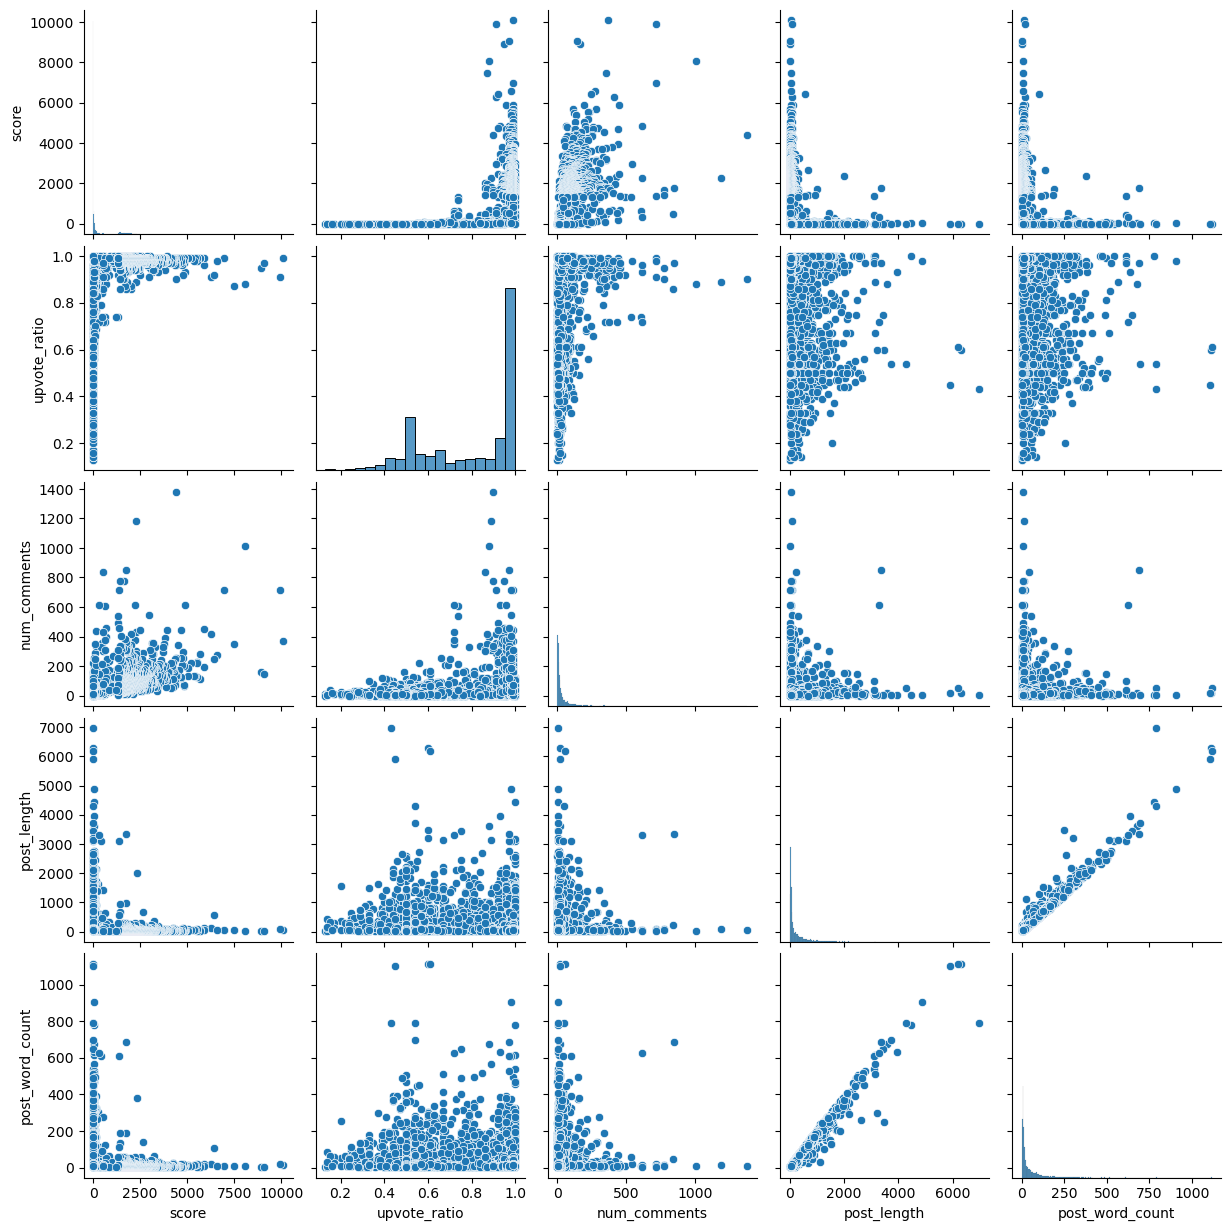

In [16]:
# Initial Look at Correlations - Using default parameters to see density of concentrated points (offwhite clusters)
sns.pairplot(df, x_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count'], y_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count']);

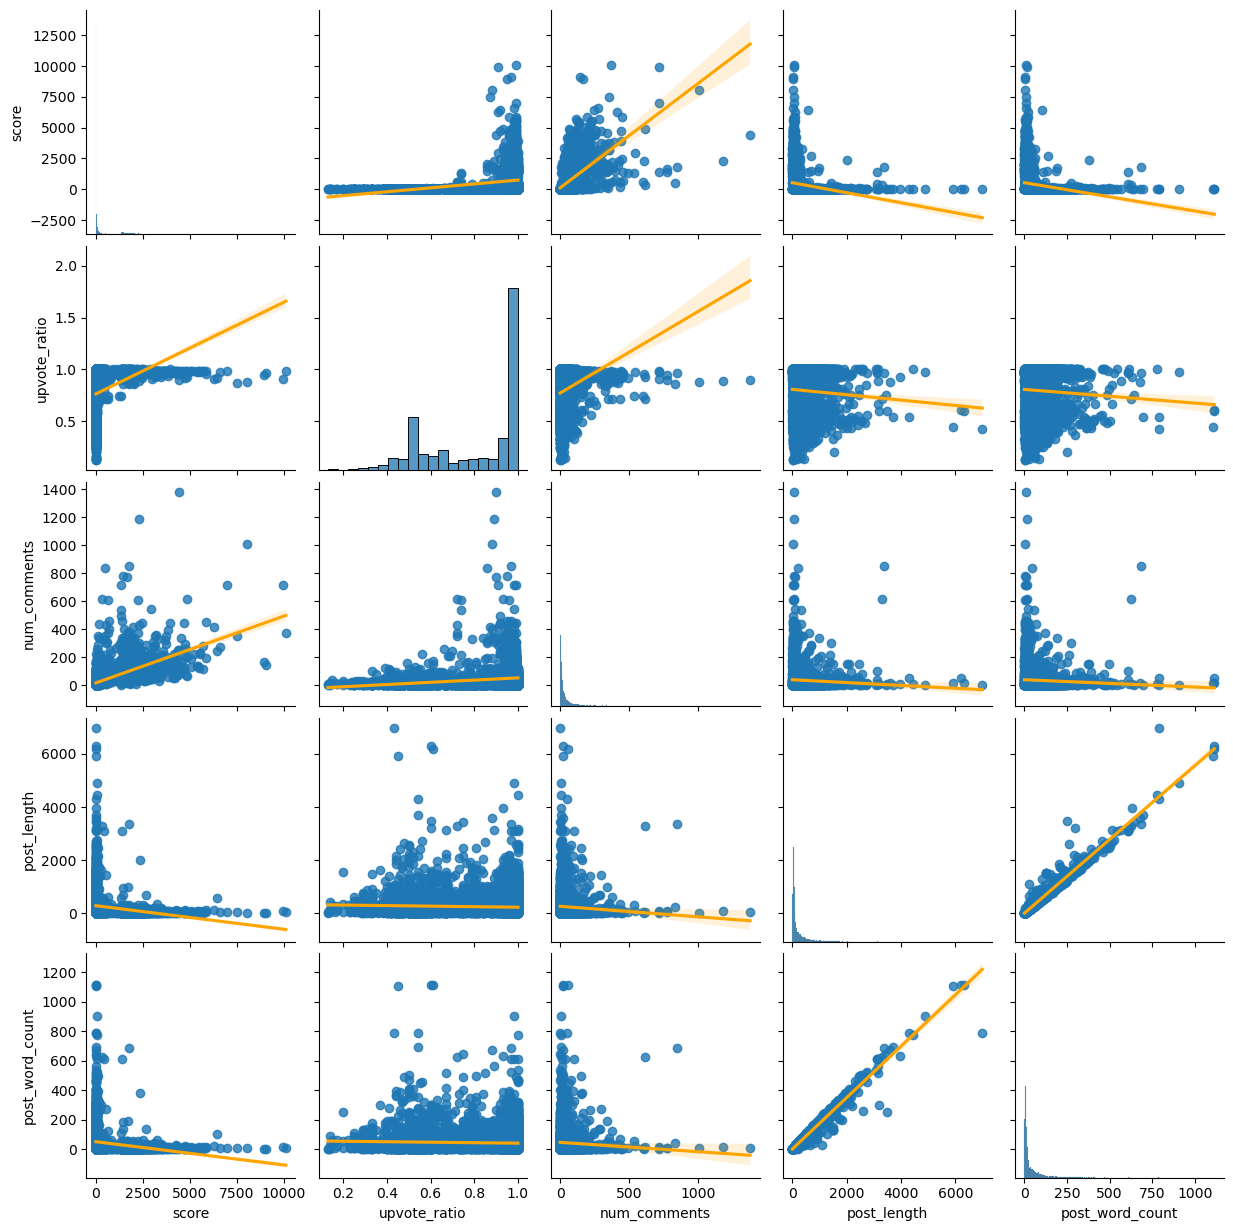

In [17]:
# With Regline
sns.pairplot(df, x_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count'], y_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count'], kind='reg', plot_kws={'line_kws':{'color':'orange'}});

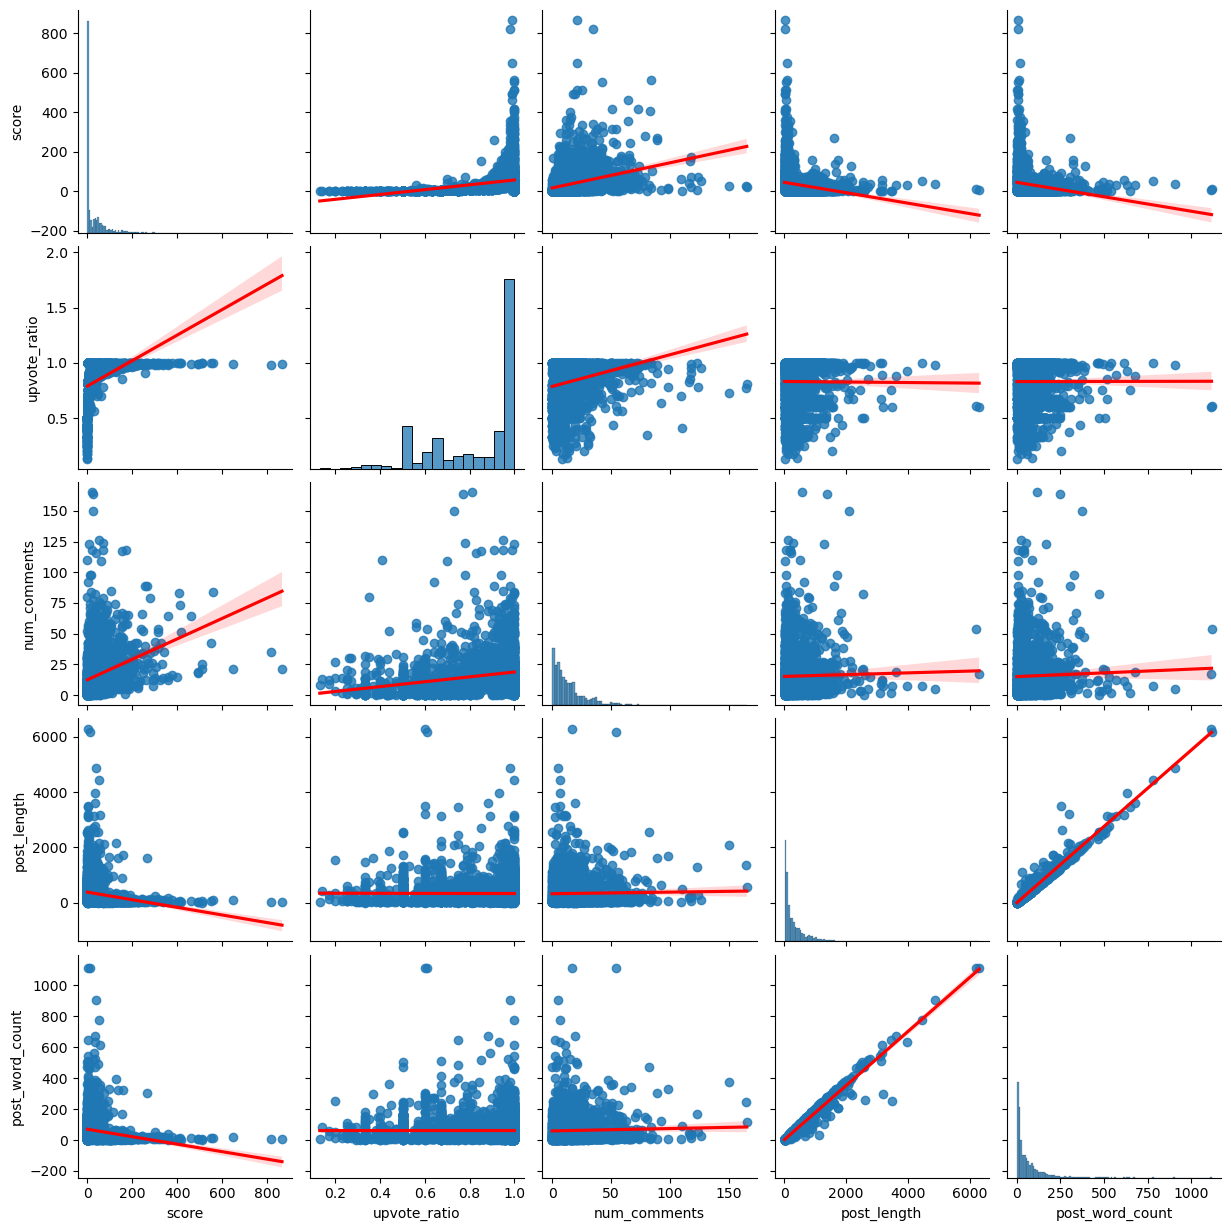

In [18]:
# Snowboarding Only - With Regline
sns.pairplot(snow, x_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count'], y_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count'], kind='reg', plot_kws={'line_kws':{'color':'red'}});

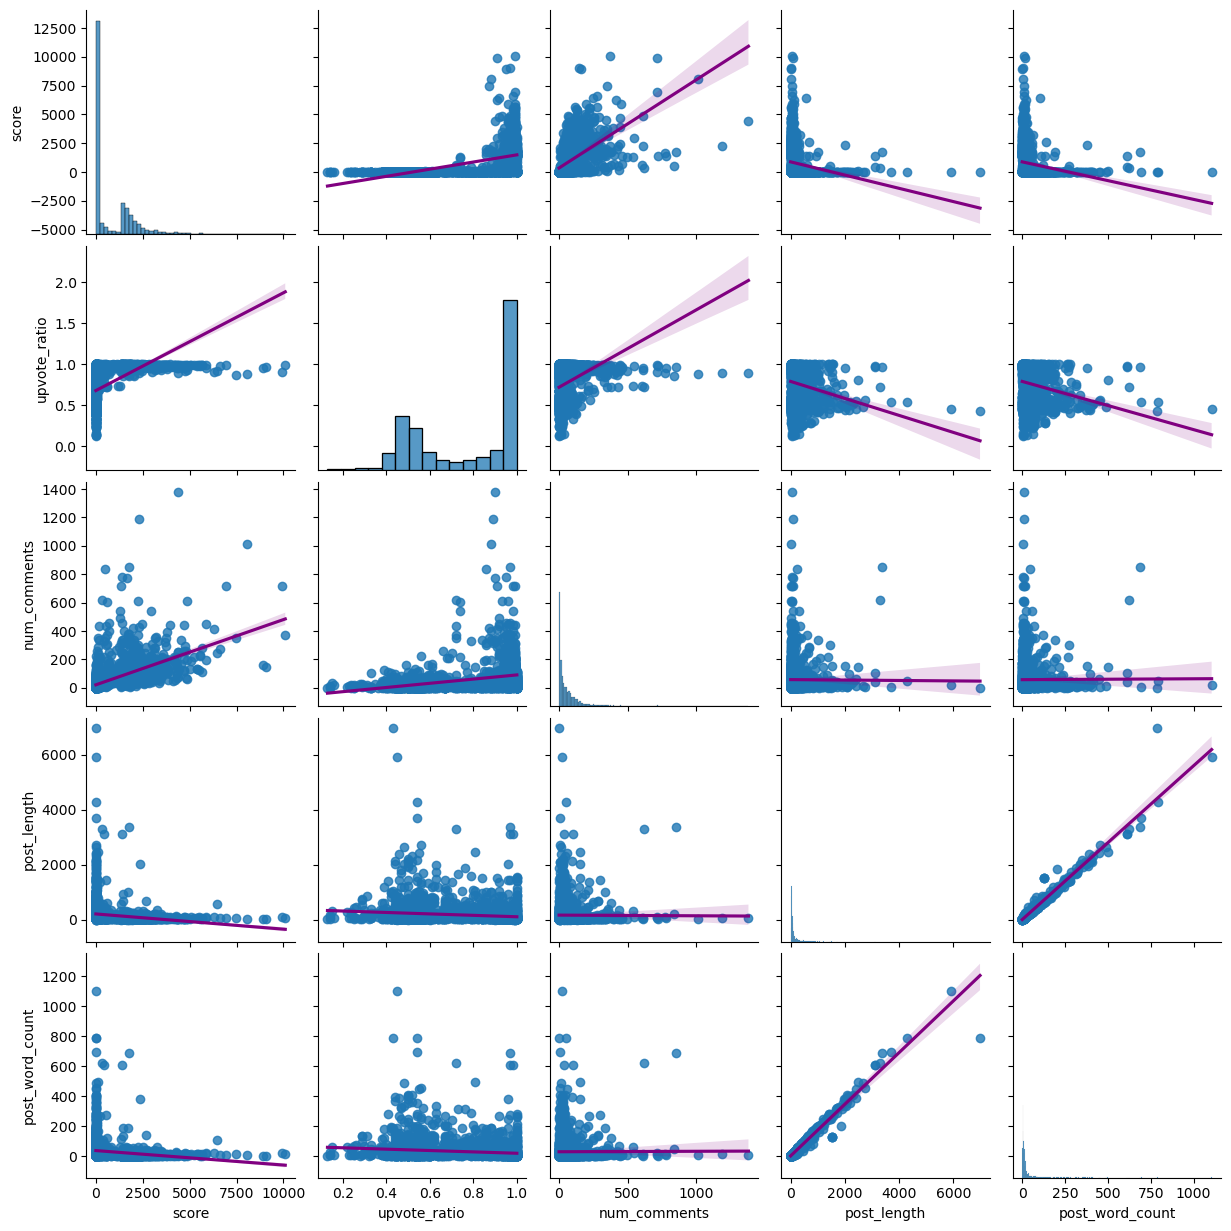

In [19]:
# Skiing Only - With Regline
sns.pairplot(ski, x_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count'], y_vars = ['score', 'upvote_ratio', 'num_comments', 'post_length', 'post_word_count'], kind='reg', plot_kws={'line_kws':{'color':'purple'}});

##### <span style='color:blue'>_There are no strong relationships between any of the continuous variables, except, unsurprisingly, post length and post word count. The histograms show very high right skewedness with some extreme outliers. There is an upward trajectory between the post's score and number of comments it gets within the Overall (both Snowboarders and Skiers) category, which appears to be being driven by Skiers; generally, the more popular the post, the more comments it will garner. Higher scores are associated with higher upvote ratios, though not always - there appear to be many posts with a score of 0 which have 100% upvote ratios. It is possible these are more recent posts, or posts which are informative, stories, announcements, or otherwise which do not create need for discussion or comment beyond giving an upvote._</span>

In [20]:
# Explore Anomylous Data Point
df[df.post_length > 6500]

# Appears to be an ad / promo

,created_utc,author,score,upvote_ratio,num_comments,subreddit,text,lem_text,stem_text,post_length,post_word_count
5558,1.536167e+09,tetonpassboarder,0,0.43,2,skiing,"ski.com is looking for the ideal candidate to experience more than a dozen resorts around the world on a single trip during january and february 2019 ski.com to hire mountain enthusiast to travel the world for ski.com’s epic dream job· in partnership with the epic pass, ski.com is looking for the ideal candidate to experience more than a dozen resorts around the world on a single trip during j...",ski com is looking for the ideal candidate to experience more than a dozen resort around the world on a single trip during january and february 2019 ski com to hire mountain enthusiast to travel the world for ski com s epic dream job in partnership with the epic pas ski com is looking for the ideal candidate to experience more than a dozen resort around the world on a single trip during januar...,ski com is look for the ideal candid to experi more than a dozen resort around the world on a singl trip dure januari and februari 2019 ski com to hire mountain enthusiast to travel the world for ski com s epic dream job in partnership with the epic pass ski com is look for the ideal candid to experi more than a dozen resort around the world on a singl trip dure januari and februari 2019 the i...,6983,789


In [21]:
df[df['text'].str.lower().str.contains('ski.com')]

,created_utc,author,score,upvote_ratio,num_comments,subreddit,text,lem_text,stem_text,post_length,post_word_count
2786,1.686410e+09,HikeBikeSkiCo,0,0.26,11,skiing,"i saw the incredible video of the skier falling 1000ft off maroon bells and wrote a blog post about it. (video included) if you found this story as interesting as i do there's his video off the fall, which he also detailed in a podcast episode. i broke both down in the below blog post for those that don't want to listen to the entire podcast. (video and podcast links included)https://hike-bike...",i saw the incredible video of the skier falling 1000ft off maroon bell and wrote a blog post about it video included if you found this story a interesting a i do there s his video off the fall which he also detailed in a podcast episode i broke both down in the below blog post for those that don t want to listen to the entire podcast video and podcast link included http hike bike ski com terri...,i saw the incred video of the skier fall 1000ft off maroon bell and wrote a blog post about it video includ if you found thi stori as interest as i do there s hi video off the fall which he also detail in a podcast episod i broke both down in the below blog post for those that don t want to listen to the entir podcast video and podcast link includ http hike bike ski com terrifi skier plummet 1...,468,71
3484,1.681837e+09,MathematicianFine228,0,0.37,15,skiing,"iso queer skiers! hey you! do you identify as lgbtq+? i'm looking for queer skiers/riders for a film project i'm working on. i'm interested to hear about your experiences in the greater ski community in regards to your gender identity or sexual orientation. as a queer person myself, i've noticed the ski community has a ""don't ask don't tell"" vibe about queerness.",iso queer skier hey you do you identify a lgbtq i m looking for queer skier rider for a film project i m working on i m interested to hear about your experience in the greater ski community in regard to your gender identity or sexual orientation a a queer person myself i ve noticed the ski community ha a don t ask don t tell vibe about queerness,iso queer skier hey you do you identifi as lgbtq i m look for queer skier rider for a film project i m work on i m interest to hear about your experi in the greater ski commun in regard to your gender ident or sexual orient as a queer person myself i ve notic the ski commun ha a don t ask don t tell vibe about queer,365,62
4700,1.468097e+09,ojsca,0,0.50,44,skiing,"advice on skis to buy for next season i'm planning on doing a ski season in the alps (probably switzerland or italy), hopefully get a job as a ski guide and thought i should invest in my first pair of skis (have always rented before, and rental is included in job offer, but thought it would be worth it). i'm a proficient skier on and off piste, but not a racer or anything. i would probably wan...",advice on ski to buy for next season i m planning on doing a ski season in the alp probably switzerland or italy hopefully get a job a a ski guide and thought i should invest in my first pair of ski have always rented before and rental is included in job offer but thought it would be worth it i m a proficient skier on and off piste but not a racer or anything i would probably want some twin ti...,advic on ski to buy for next season i m plan on do a ski season in the alp probabl switzerland or itali hope get a job as a ski guid and thought i should invest in my first pair of ski have alway rent befor and rental is includ in job offer but thought it would be worth it i m a profici skier on and off pist but not a racer or anyth i would probabl want some twin tip for park etc what would yo...,1211,225
5394,1.647610e+09,Freeski802,0,0.47,13,skiing,"how do people get sponsored? i've seen so many people get sponsored who aren't ""considered"" pros and they get sponsored by awesome ski company's. how does a good skier but not like crazy good get sponsored?",how do people get sp

In [22]:
# Only the outlier data point seems to be an advertisement, the rest seem fine - exclude the one post
df = df[df.post_length < 6500]

In [23]:
df.shape

(5638, 11)

In [31]:
# Explore other three datapoints (snowboarding observations) to see if they are anomylous / need to be deleted
df[(df.post_word_count < 400) & ((df.post_length > 2500) & (df.post_length < 4000))]

,created_utc,author,score,upvote_ratio,num_comments,subreddit,text,lem_text,stem_text,post_length,post_word_count
141,1.682463e+09,SnowNewb,1,0.6,7,snowboardingnoobs,"being toe dragged or not, that's the question, (update with bindings) hi guys,i've asked the community previsouly in this post: [https://www.reddit.com/r/snowboardingnoobs/comments/12qqp2f/capita\_doa\_154\_w\_us\_10\_shoes\_to\_be\_toedragged\_or/](https://www.reddit.com/r/snowboardingnoobs/comments/12qqp2f/capita_doa_154_w_us_10_shoes_to_be_toedragged_or/)since i'm unable to answer to my th...",being toe dragged or not that s the question update with binding hi guy i ve asked the community previsouly in this post http www reddit com r snowboardingnoobs comment 12qqp2f caput _doa _154 _w _us _10 _shoes _to _be _toedragged _or http www reddit com r snowboardingnoobs comment 12qqp2f capita_doa_154_w_us_10_shoes_to_be_toedragged_or since i m unable to answer to my thread with image i m n...,be toe drag or not that s the question updat with bind hi guy i ve ask the commun previsouli in thi post http www reddit com r snowboardingnoob comment 12qqp2f capita _doa _154 _w _u _10 _shoe _to _be _toedrag _or http www reddit com r snowboardingnoob comment 12qqp2f capita_doa_154_w_us_10_shoes_to_be_toedragged_or sinc i m unabl to answer to my thread with imag i m new to reddit i ve start a...,3489,251
185,1.681831e+09,SnowNewb,3,1.0,16,snowboardingnoobs,"capita doa 154 w/ us 10 shoes, to be toe-dragged or not ? hi guys,greeting from france !snowboarding since i'm 10y.o, currently 35, tired with rental gear, i just bought my first snowboard: a capita doa 154, i still need to buy bindings, (i was considering union strata size m). i will be using my ~~trashed~~ old dc judge boots (us 10, eur 43, mondo 28) with it.i e-mailed capita us asking about...",caput doa 154 w u 10 shoe to be toe dragged or not hi guy greeting from france snowboarding since i m 10y o currently 35 tired with rental gear i just bought my first snowboard a caput doa 154 i still need to buy binding i wa considering union stratum size m i will be using my trashed old dc judge boot u 10 eur 43 mondo 28 with it i e mailed caput u asking about buying a 153w or a 154regular w...,capita doa 154 w us 10 shoe to be toe drag or not hi guy greet from franc snowboard sinc i m 10i o current 35 tire with rental gear i just bought my first snowboard a capita doa 154 i still need to buy bind i wa consid union strata size m i will be use my trash old dc judg boot us 10 eur 43 mondo 28 with it i e mail capita us ask about buy a 153w or a 154regular with my boot size they told me ...,2616,260
2653,1.646926e+09,Seabaybe,1,0.6,7,snowboardingnoobs,"help me pick a noobie board! (in desperate need of advice because i can't decide) looking to get my first board for next season while things are on sale! i've settled on either the union rosa or union juliette bindings to start with. i am 5'2"" and about 130 lbs, womens size 8 shoes. so was looking at a 142-143cm board. open to shorter or longer if you think it is needed based on the next info....",help me pick a noobie board in desperate need of advice because i can t decide looking to get my first board for next season while thing are on sale i ve settled on either the union rosa or union juliette binding to start with i am 5 2 and about 130 lb woman size 8 shoe so wa looking at a 142 143cm board open to shorter or longer if you think it is needed based on the next info i will be ridin...,help me pick a noobi board in desper need of advic becaus i can t decid look to get my first board for next season while thing are on sale i ve settl on either the union rosa or union juliett bind to start with i am 5 2 and about 130 lb women size 8 shoe so wa look at a 142 143cm board open to shorter or longer if you think it is need base on the next info i will be ride on west coast taho slc...,3205,299


##### <span style='color:blue'>_A few data points which were visually inspected to be anomalous were briefly explored. One of the posts appeared to be a ski.com advertisement and was removed._</span>

C:\Users\farah\AppData\Local\Temp\ipykernel_26488\2060145566.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\2060145566.py:26: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = snow.corr()
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\2060145566.py:46: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = ski.corr()


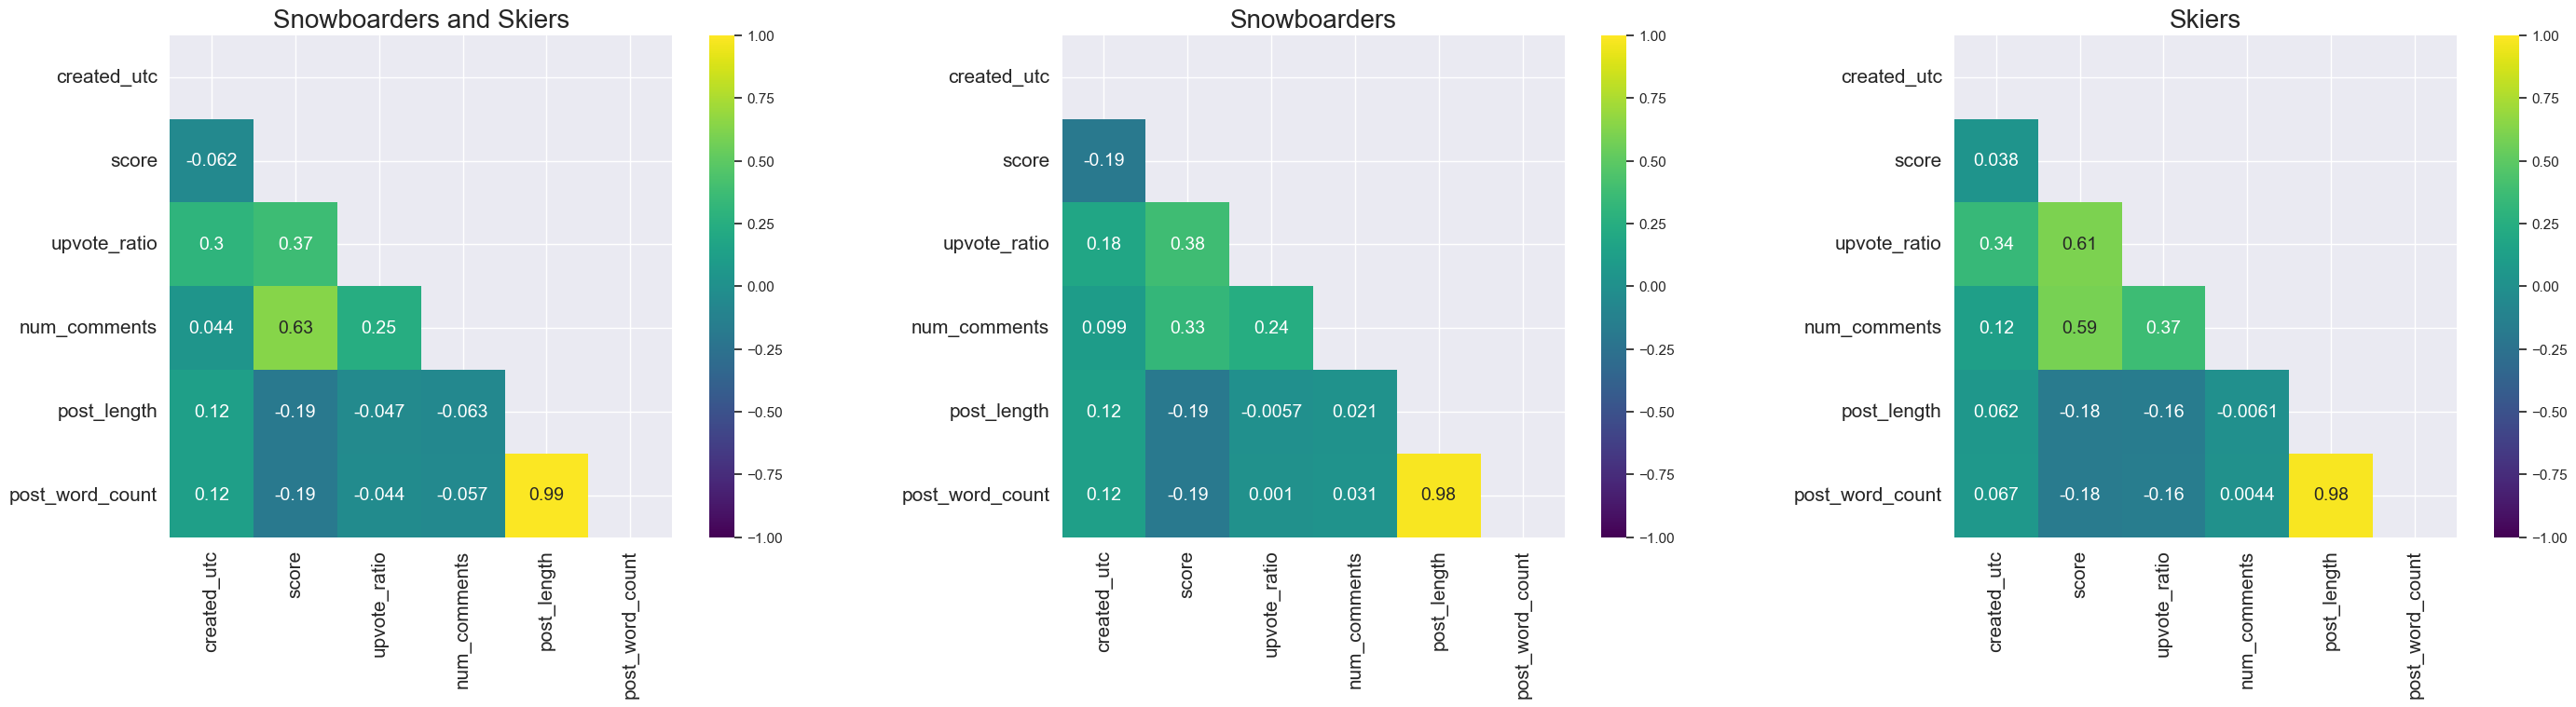

In [103]:
# Adapted from Python Graph Gallery

fig, axs = plt.subplots(1, 3, figsize=(35,7))

corr = df.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            mask = mask, 
            square = True, 
            cmap = 'viridis', 
            annot = True, 
            vmin = -1, 
            vmax = 1,
            ax=axs[0],
            annot_kws={
                'fontsize': 14,
                #'fontweight': 'bold'
             });
axs[0].set_title("Snowboarders and Skiers", fontdict={'fontsize': 20})
axs[0].set_xticklabels(axs[0].get_xticklabels(), fontsize=15)
axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=15)

    
corr = snow.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            mask = mask, 
            square = True, 
            cmap = 'viridis', 
            annot = True, 
            vmin = -1, 
            vmax = 1,
            ax=axs[1],
            annot_kws={
            'fontsize': 14,
            #'fontweight': 'bold'
             });
axs[1].set_title("Snowboarders", fontdict={'fontsize': 20})
axs[1].set_xticklabels(axs[1].get_xticklabels(), fontsize=15)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=15)

corr = ski.corr()
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, 
            mask = mask, 
            square = True, 
            cmap = 'viridis', 
            annot = True, 
            vmin = -1, 
            vmax = 1,
            ax=axs[2],
            annot_kws={
            'fontsize': 14,
            #'fontweight': 'bold'
             });
axs[2].set_title("Skiers", fontdict={'fontsize': 20})
axs[2].set_xticklabels(axs[2].get_xticklabels(), fontsize=15)
axs[2].set_yticklabels(axs[2].get_yticklabels(), fontsize=15)

plt.show();

##### <span style = 'color: blue'>_In the snowboarding Reddit community, there was not a strong correlation between score of post and number of comments per post or upvote ratio (R = 0.33 and R = 0.38, respectively). However, the skiing Reddit community had a much stronger correlation between score and these two variables (R = 0.59 and R = 0.61, respectively). This may indicate higher engagement among the skiing Reddit community, potentially leading to a more active and interactive environment including greater propensity to ask questions, seek advice, and engage in discussions related to the content of the posts._ </span>

C:\Users\farah\AppData\Local\Temp\ipykernel_26488\673098029.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\673098029.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\673098029.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(axs[2].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\673098029.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_yticklabels(axs[3].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\673098029.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[4].set_yticklabels(axs[4].ge

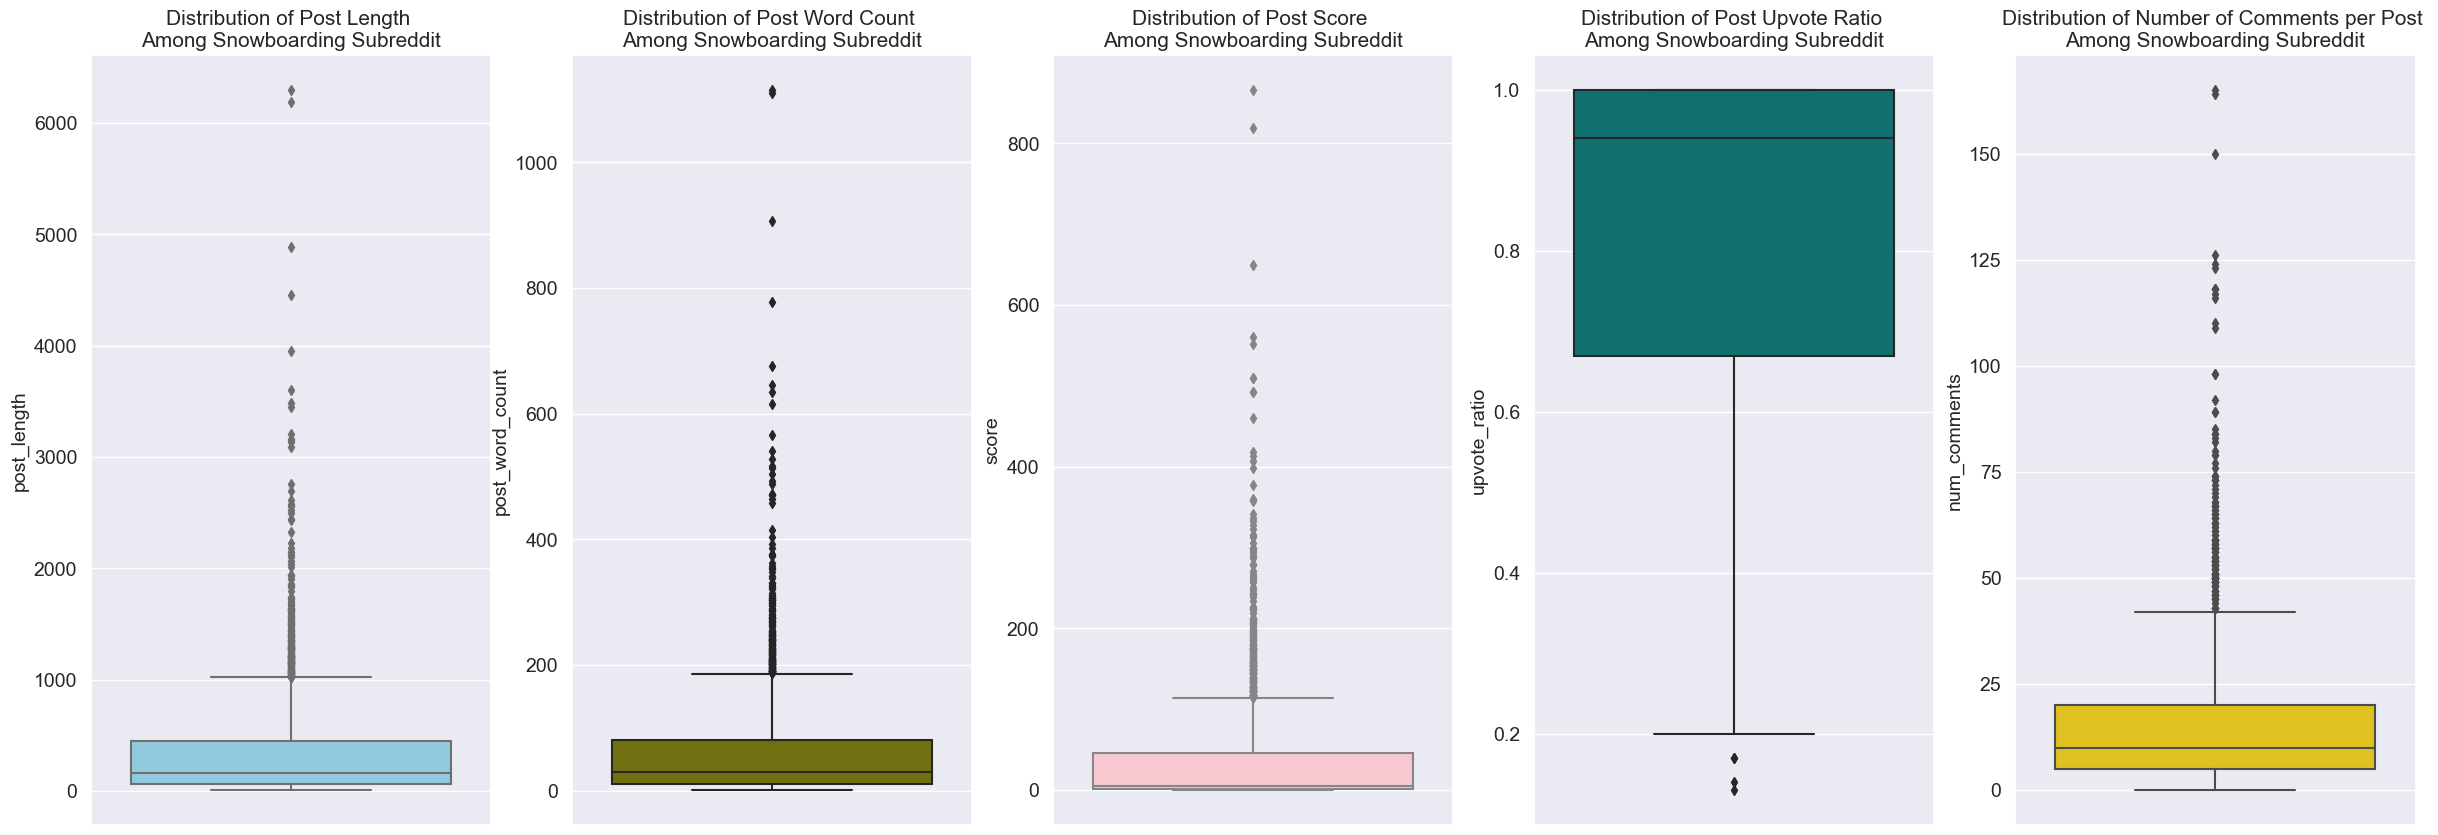

In [80]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(30, 10))

sns.boxplot(y='post_length', data=snow, color='skyblue', ax=axs[0])
sns.boxplot(y='post_word_count', data=snow, color='olive', ax=axs[1])
sns.boxplot(y='score', data=snow, color='pink', ax=axs[2])
sns.boxplot(y='upvote_ratio', data=snow, color='teal', ax=axs[3])
sns.boxplot(y='num_comments', data=snow, color='gold', ax=axs[4])

axs[0].set_title('Distribution of Post Length \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15})
axs[1].set_title('Distribution of Post Word Count \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15})
axs[2].set_title('Distribution of Post Score \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15})
axs[3].set_title('Distribution of Post Upvote Ratio \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15})
axs[4].set_title('Distribution of Number of Comments per Post \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15})

axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=14)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=14)
axs[2].set_ylabel(axs[2].get_ylabel(), fontsize=14)
axs[3].set_ylabel(axs[3].get_ylabel(), fontsize=14)
axs[4].set_ylabel(axs[4].get_ylabel(), fontsize=14)

axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=14)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=14)
axs[2].set_yticklabels(axs[2].get_yticklabels(), fontsize=14)
axs[3].set_yticklabels(axs[3].get_yticklabels(), fontsize=14)
axs[4].set_yticklabels(axs[4].get_yticklabels(), fontsize=14)

plt.show();

C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1473344608.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1473344608.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1473344608.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(axs[2].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1473344608.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[3].set_yticklabels(axs[3].get_yticklabels(), fontsize=14)
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1473344608.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[4].set_yticklabels(axs[

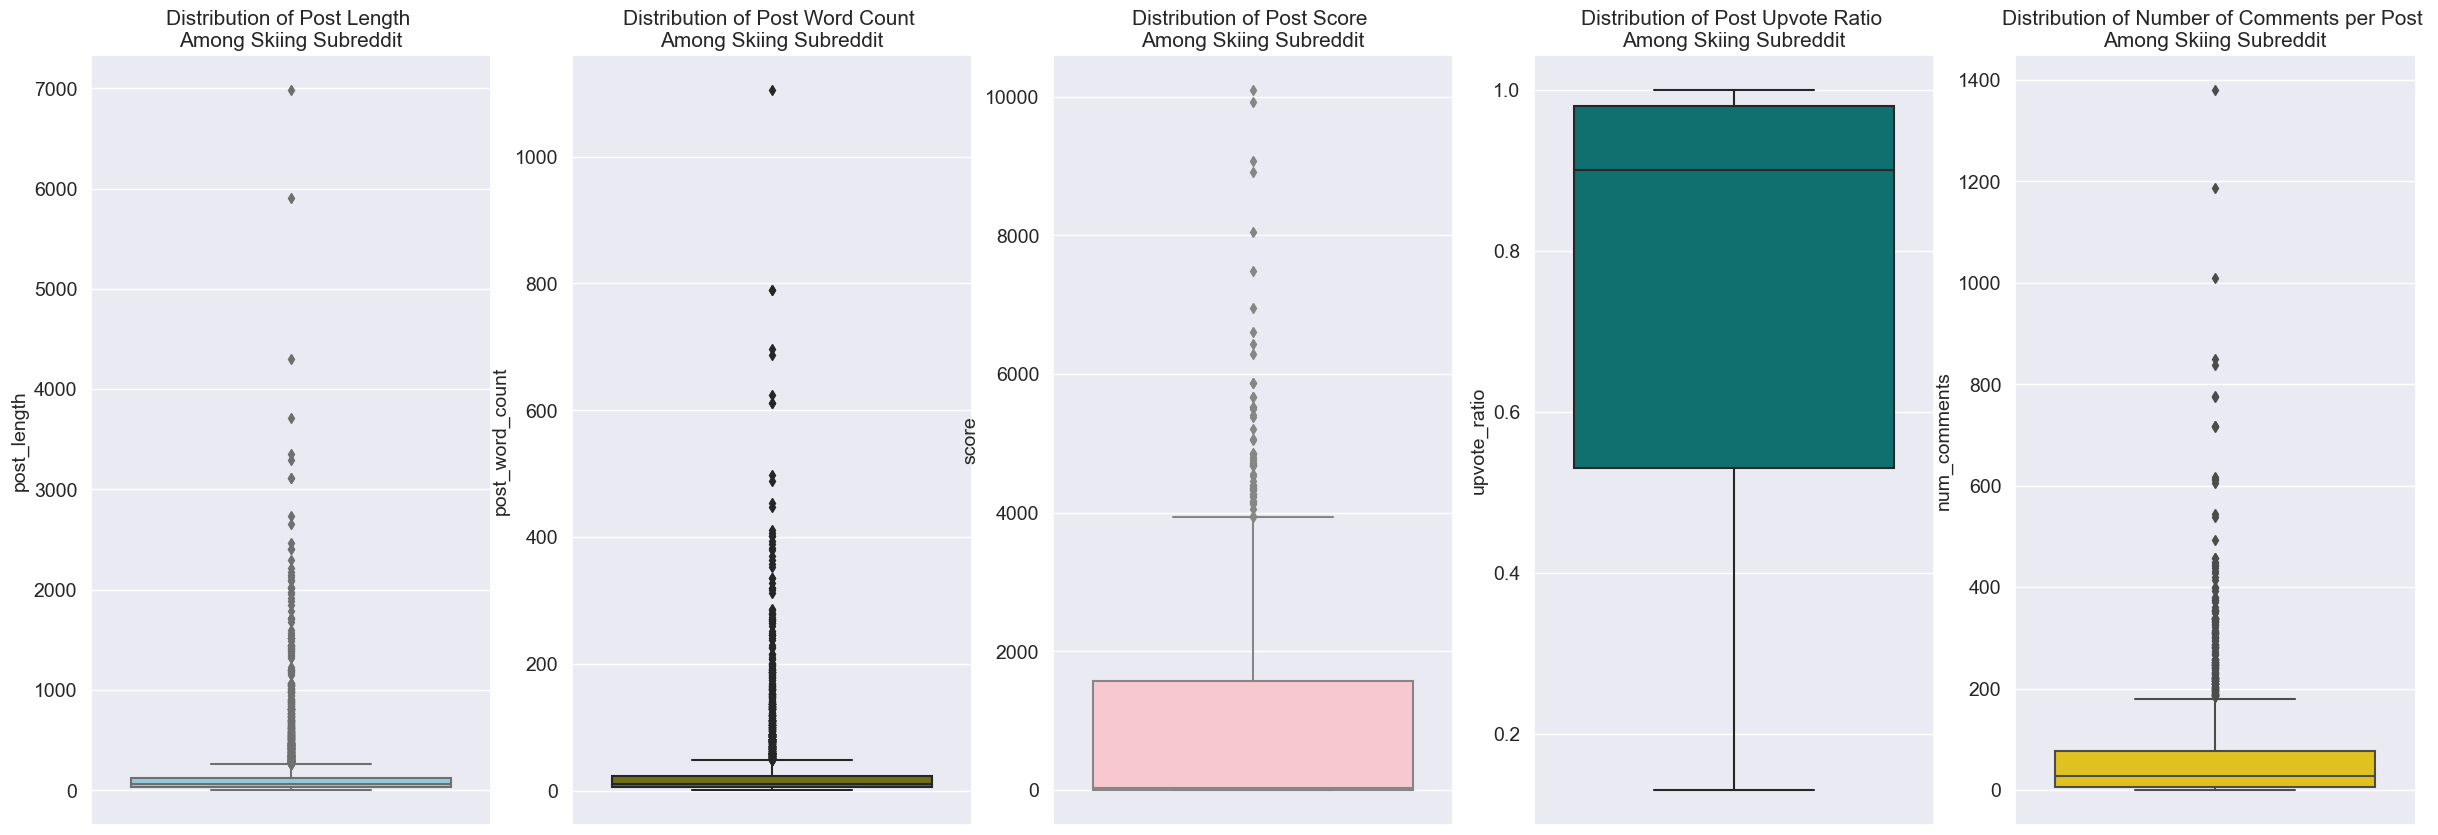

In [86]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 5, figsize=(30, 10))

sns.boxplot(y='post_length', data=ski, color='skyblue', ax=axs[0])
sns.boxplot(y='post_word_count', data=ski, color='olive', ax=axs[1])
sns.boxplot(y='score', data=ski, color='pink', ax=axs[2])
sns.boxplot(y='upvote_ratio', data=ski, color='teal', ax=axs[3])
sns.boxplot(y='num_comments', data=ski, color='gold', ax=axs[4])

axs[0].set_title('Distribution of Post Length \nAmong Skiing Subreddit', fontdict={'fontsize': 15})
axs[1].set_title('Distribution of Post Word Count \nAmong Skiing Subreddit', fontdict={'fontsize': 15})
axs[2].set_title('Distribution of Post Score \nAmong Skiing Subreddit', fontdict={'fontsize': 15})
axs[3].set_title('Distribution of Post Upvote Ratio \nAmong Skiing Subreddit', fontdict={'fontsize': 15})
axs[4].set_title('Distribution of Number of Comments per Post \nAmong Skiing Subreddit', fontdict={'fontsize': 15})

axs[0].set_ylabel(axs[0].get_ylabel(), fontsize=14)
axs[1].set_ylabel(axs[1].get_ylabel(), fontsize=14)
axs[2].set_ylabel(axs[2].get_ylabel(), fontsize=14)
axs[3].set_ylabel(axs[3].get_ylabel(), fontsize=14)
axs[4].set_ylabel(axs[4].get_ylabel(), fontsize=14)

axs[0].set_yticklabels(axs[0].get_yticklabels(), fontsize=14)
axs[1].set_yticklabels(axs[1].get_yticklabels(), fontsize=14)
axs[2].set_yticklabels(axs[2].get_yticklabels(), fontsize=14)
axs[3].set_yticklabels(axs[3].get_yticklabels(), fontsize=14)
axs[4].set_yticklabels(axs[4].get_yticklabels(), fontsize=14)

plt.show();

##### <span style='color:blue'>_All variables other than upvote ratio are very right skewed. There is a very large range of post lengths, word counts, scores, and number of comments, but most of the data (75-99%) lie much closer to the minimum. Most variables within the skiing community are much more narrow than that snowboarding community. Post length and word count are generally higher in the snowboarding subreddit, whereas number of comments and the post score is generally higher amongst the skiing subreddit._</span>

In [ ]:
# Look at Histograms w/o Outliers (Visually Determined via Boxplots)

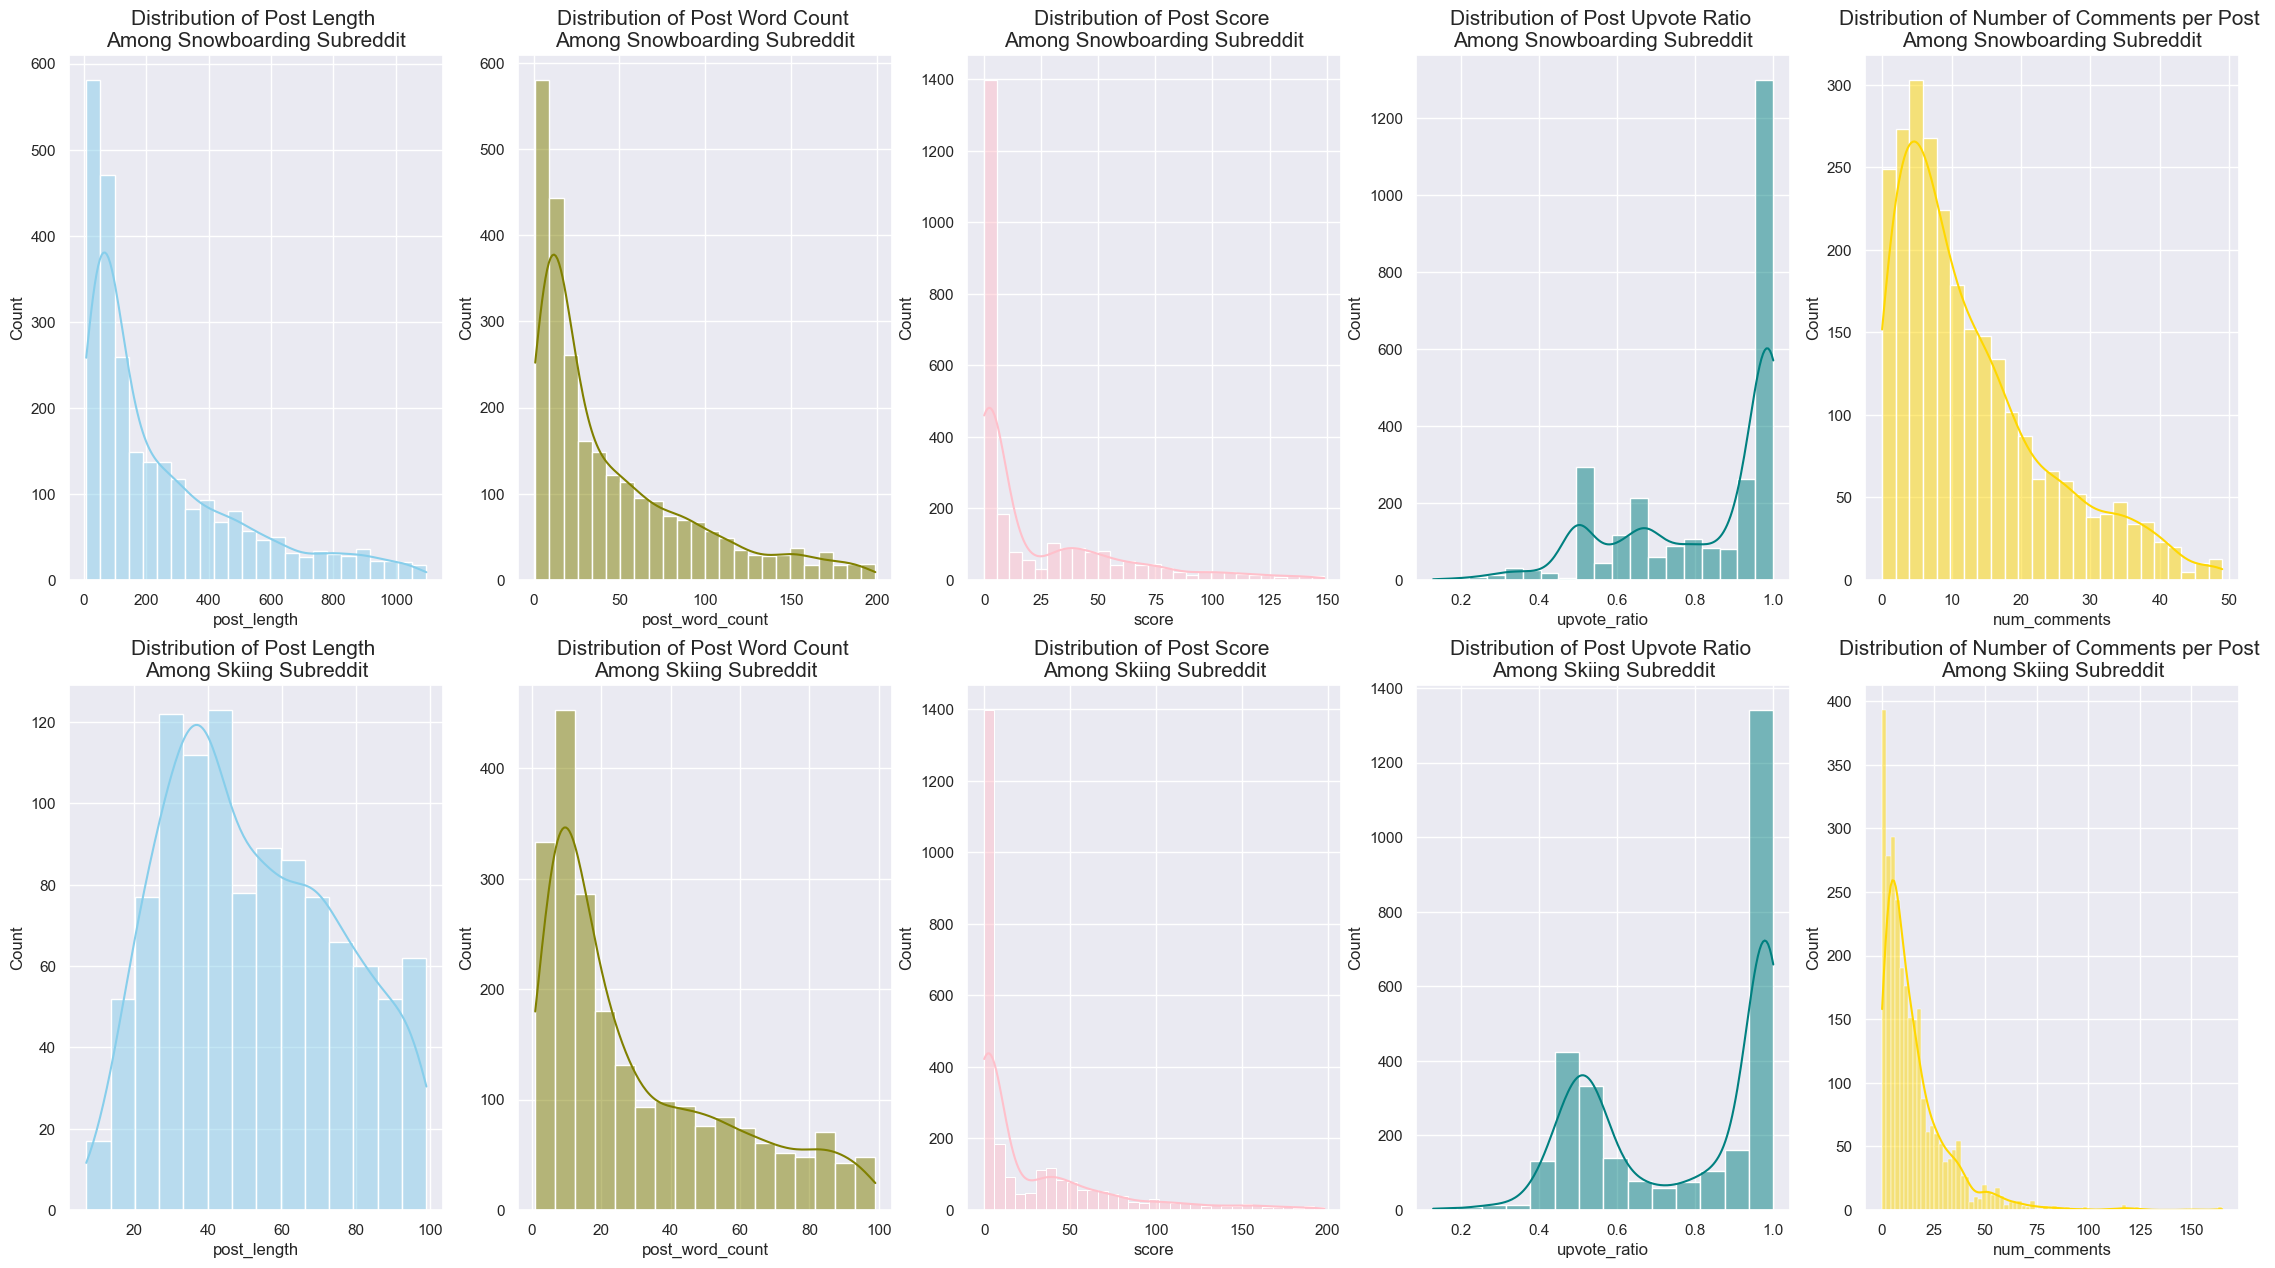

In [102]:
snow_ps_filter = snow[snow.post_length < 1100]
snow_pwc_filter = snow[snow.post_word_count < 200]
snow_scr_filter = snow[snow.score < 150]
snow_com_filter = snow[snow.num_comments < 50]

ski_ps_filter = snow[snow.post_length < 100]
ski_pwc_filter = snow[snow.post_word_count < 100]
ski_scr_filter = snow[snow.score < 200]
ski_com_filter = snow[snow.num_comments < 200]

sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 5, figsize=(28, 15))

sns.histplot(data=snow_ps_filter, x="post_length", kde=True, color="skyblue", ax=axs[0,0])
sns.histplot(data=snow_pwc_filter, x="post_word_count", kde=True, color="olive", ax=axs[0,1])
sns.histplot(data=snow_scr_filter, x="score", kde=True, color="pink", ax=axs[0,2])
sns.histplot(data=snow, x="upvote_ratio", kde=True, color="teal", ax=axs[0,3])
sns.histplot(data=snow_com_filter, x="num_comments", kde=True, color="gold", ax=axs[0,4])

sns.histplot(data=ski_ps_filter, x="post_length", kde=True, color="skyblue", ax=axs[1,0])
sns.histplot(data=ski_pwc_filter, x="post_word_count", kde=True, color="olive", ax=axs[1,1])
sns.histplot(data=ski_scr_filter, x="score", kde=True, color="pink", ax=axs[1,2])
sns.histplot(data=ski, x="upvote_ratio", kde=True, color="teal", ax=axs[1,3])
sns.histplot(data=ski_com_filter, x="num_comments", kde=True, color="gold", ax=axs[1,4])

axs[0,0].set_title('Distribution of Post Length \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15})
axs[0,1].set_title('Distribution of Post Word Count \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15});
axs[0,2].set_title('Distribution of Post Score \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15});
axs[0,3].set_title('Distribution of Post Upvote Ratio \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15});
axs[0,4].set_title('Distribution of Number of Comments per Post \nAmong Snowboarding Subreddit', fontdict={'fontsize': 15});

axs[1,0].set_title('Distribution of Post Length \nAmong Skiing Subreddit', fontdict={'fontsize': 15})
axs[1,1].set_title('Distribution of Post Word Count \nAmong Skiing Subreddit', fontdict={'fontsize': 15});
axs[1,2].set_title('Distribution of Post Score \nAmong Skiing Subreddit', fontdict={'fontsize': 15});
axs[1,3].set_title('Distribution of Post Upvote Ratio \nAmong Skiing Subreddit', fontdict={'fontsize': 15});
axs[1,4].set_title('Distribution of Number of Comments per Post \nAmong Skiing Subreddit', fontdict={'fontsize': 15});

plt.show()

##### <span style='color:blue'>_When taking out extreme values, all variables are still right skewed except upvote ratio. As was seen in the prior boxplots, the snowboarding community has more long posts and higher word counts, whereas number of comments and scores of the post are generally higher in the skiing community group._</span>

In [151]:
# Look at user level
snow['dummy'] = 1

snow_ids = snow.groupby('author').agg({
    'post_length': 'mean',
    'post_word_count': 'mean',
    'score': 'mean',
    'num_comments': 'mean',
    'dummy': 'count'
}).reset_index().rename(columns = {'post_length': 'postlen_mean', 'post_word_count': 'pwc_mean', 'score': 'score_mean', 'num_comments': 'comm_mean', 'dummy': 'count'})

snow_ids['subreddit'] = "snowboardingnoobs"

In [152]:
ski['dummy'] = 1

ski_ids = ski.groupby('author').agg({
    'post_length': 'mean',
    'post_word_count': 'mean',
    'score': 'mean',
    'num_comments': 'mean',
    'dummy': 'count'
}).reset_index().rename(columns = {'post_length': 'postlen_mean', 'post_word_count': 'pwc_mean', 'score': 'score_mean', 'num_comments': 'comm_mean', 'dummy': 'count'})

ski_ids['subreddit'] = "skiing"

In [153]:
print(f'Snowboarding Subreddit: {snow.shape[0]} posts among {snow_ids.shape[0]} authors')
print(f'Skiing Subreddit: {ski.shape[0]} posts among {ski_ids.shape[0]} authors')

Snowboarding Subreddit: 2752 posts among 1967 authors
Skiing Subreddit: 2887 posts among 2152 authors


In [154]:
snow_ids.sort_values(by='count', ascending=False).head(10)

,author,postlen_mean,pwc_mean,score_mean,comm_mean,count,subreddit
496,Johnathanbuckhouse,57.291667,10.125000,13.916667,4.041667,24,snowboardingnoobs
1891,twinbee,713.789474,127.368421,19.000000,31.473684,19,snowboardingnoobs
1202,canuck-dirk,177.833333,33.500000,118.416667,27.750000,12,snowboardingnoobs
508,Jxh57601206,277.363636,52.000000,14.090909,16.727273,11,snowboardingnoobs
497,Johnny_snipes,81.454545,14.909091,17.454545,2.090909,11,snowboardingnoobs
753,PirateboarderLife,93.800000,16.100000,35.500000,6.600000,10,snowboardingnoobs
338,Fall_Ace,463.875000,87.625000,36.625000,16.000000,8,snowboardingnoobs
1462,kdawg2894,134.125000,25.500000,55.875000,8.750000,8,snowboardingnoobs
848,SeafoamCoast,812.142857,156.714286,46.857143,23.857143,7,snowboardingnoobs
230,Crrack,619.285714,117.428571,6.142857,23.000000,7,snowboardingnoobs


In [155]:
ski_ids.sort_values(by='count', ascending=False).head(10)

,author,postlen_mean,pwc_mean,score_mean,comm_mean,count,subreddit
1664,maltamur,48.384615,8.807692,1570.961538,73.153846,26,skiing
309,EverestMaher,106.130435,16.826087,743.000000,227.652174,23,skiing
786,Robertsimpsion,400.625000,60.125000,6.125000,9.750000,16,skiing
1414,funpow,46.625000,8.562500,2375.937500,98.312500,16,skiing
478,JonBoah,42.416667,7.750000,145.583333,21.250000,12,skiing
2075,twomoments,47.700000,9.000000,1743.200000,81.300000,10,skiing
809,SalesMountaineer,87.200000,15.900000,249.300000,42.600000,10,skiing
257,DestroyedLolo,72.300000,14.200000,15.600000,2.300000,10,skiing
823,Senditserg,44.900000,9.100000,1713.200000,79.900000,10,skiing
2110,whistler_life,63.111111,11.222222,1637.111111,69.222222,9,skiing


In [156]:
# See if any of the authors are the same

ids = pd.concat([snow_ids, ski_ids], axis = 0)
ids.shape

(4119, 7)

In [157]:
chk = ids.drop_duplicates(subset=['author'])
f'{ids.shape[0] - chk.shape[0]} overlapping authors between the two communities, :)'

'9 overlapping authors between the two communities, :)'

In [158]:
ids.describe()

,postlen_mean,pwc_mean,score_mean,comm_mean,count
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,253.684124,45.909461,414.190074,36.549572,1.317796
std,409.366363,73.646951,895.604473,64.575891,1.169987
min,4.000000,1.000000,0.000000,0.000000,1.000000
25%,42.928571,8.000000,1.000000,6.000000,1.000000
50%,92.000000,17.000000,10.000000,15.000000,1.000000
75%,307.000000,56.000000,150.000000,39.000000,1.000000
max,6187.000000,1115.000000,10096.000000,1010.000000,26.000000


In [159]:
snow_ids.describe()

,postlen_mean,pwc_mean,score_mean,comm_mean,count
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,345.869925,62.390266,33.636032,15.170575,1.344179
std,450.488618,80.450602,63.561048,15.818240,1.103954
min,8.000000,1.000000,0.000000,0.000000,1.000000
25%,66.000000,12.000000,1.000000,5.000000,1.000000
50%,185.000000,34.000000,5.000000,10.500000,1.000000
75%,467.500000,85.000000,43.000000,20.000000,1.000000
max,6187.000000,1115.000000,866.000000,165.000000,24.000000


In [160]:
ski_ids.describe()

,postlen_mean,pwc_mean,score_mean,comm_mean,count
count,2152.000000,2152.000000,2152.000000,2152.000000,2152.00000
mean,169.423218,30.845454,762.029201,56.090691,1.29368
std,347.082412,63.188038,1130.675558,83.394760,1.22700
min,4.000000,1.000000,0.000000,0.000000,1.00000
25%,35.000000,6.000000,1.000000,7.000000,1.00000
50%,62.000000,11.000000,26.500000,28.000000,1.00000
75%,142.250000,26.625000,1532.625000,74.000000,1.00000
max,5907.000000,1105.000000,10096.000000,1010.000000,26.00000


In [188]:
snow_descrip = snow_ids.describe().loc['mean'].to_frame().T #source: https://datascientyst.com/append-pandas-series-dataframe/
ski_descrip = ski_ids.describe().loc['mean'].to_frame().T

In [231]:
snow_descrip['subreddit'] = 'Snowboarding'
ski_descrip['subreddit'] = 'Skiing'

snow_descrip['community'] = 'Community'
ski_descrip['community'] = 'Community'

In [232]:
descrips = pd.concat([snow_descrip, ski_descrip], axis=0)

In [233]:
descrips

,postlen_mean,pwc_mean,score_mean,comm_mean,count,subreddit,community
mean,345.869925,62.390266,33.636032,15.170575,1.344179,Snowboarding,Community
mean,169.423218,30.845454,762.029201,56.090691,1.293680,Skiing,Community


C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1843103851.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1843103851.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1843103851.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1843103851.py:38: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\1843103851.py:47: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


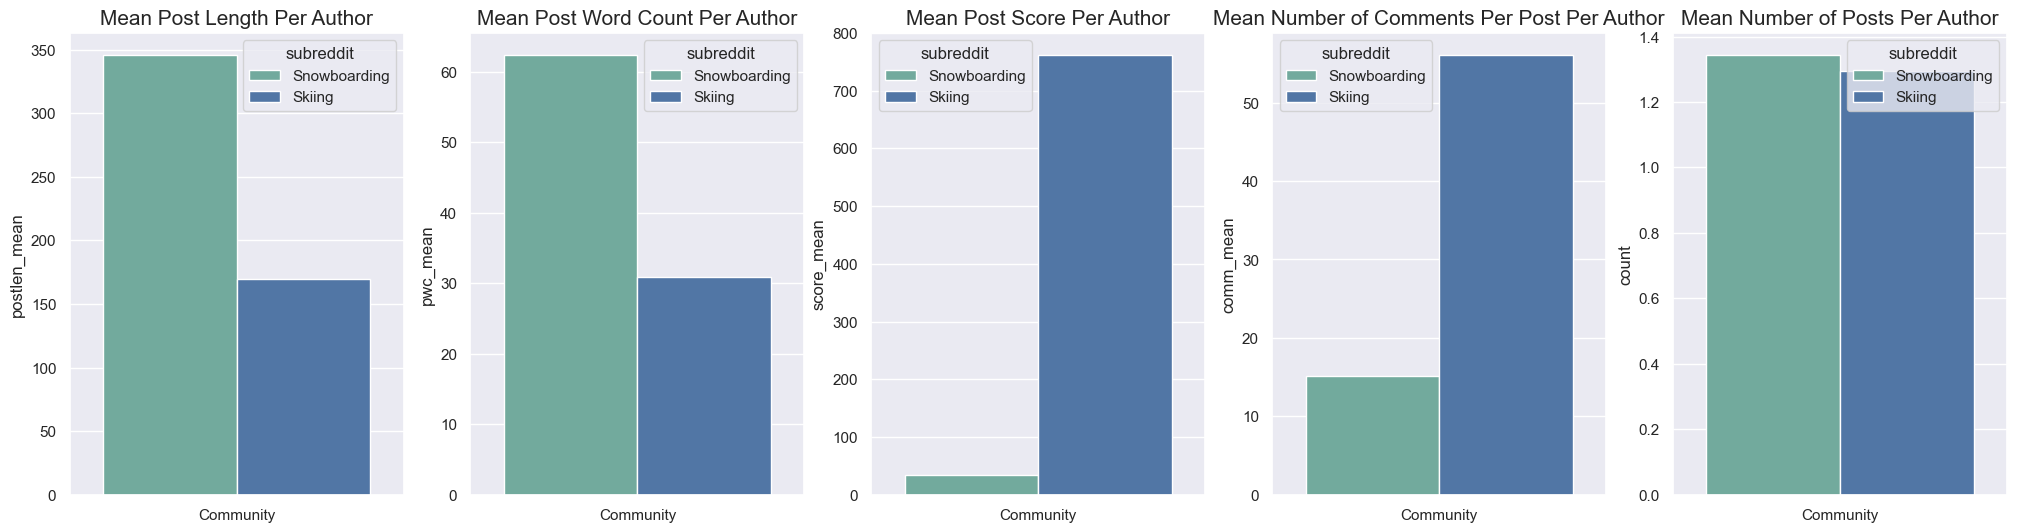

In [236]:
# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))


# Set the figure size
#plt.figure(figsize=(3, 4))
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

# grouped barplot
ax = sns.barplot(
    x="community", 
    y="postlen_mean", 
    hue="subreddit", 
    data=descrips, 
    ci=None,
    ax=axs[0]
    );

ax = sns.barplot(
    x="community", 
    y="pwc_mean", 
    hue="subreddit", 
    data=descrips, 
    ci=None,
    ax=axs[1]
    );

ax = sns.barplot(
    x="community", 
    y="score_mean", 
    hue="subreddit", 
    data=descrips, 
    ci=None,
    ax=axs[2]
    );

ax = sns.barplot(
    x="community", 
    y="comm_mean", 
    hue="subreddit", 
    data=descrips, 
    ci=None,
    ax=axs[3]
    );

ax = sns.barplot(
    x="community", 
    y="count", 
    hue="subreddit", 
    data=descrips, 
    ci=None,
    ax=axs[4]
    );

axs[0].set_title('Mean Post Length Per Author', fontdict={'fontsize': 15})
axs[1].set_title('Mean Post Word Count Per Author', fontdict={'fontsize': 15});
axs[2].set_title('Mean Post Score Per Author', fontdict={'fontsize': 15});
axs[3].set_title('Mean Number of Comments Per Post Per Author', fontdict={'fontsize': 15});
axs[4].set_title('Mean Number of Posts Per Author', fontdict={'fontsize': 15});

for ax in axs:
    ax.set_xlabel(None)
    
#plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper center', borderaxespad=0, title = 'Subreddit Community' ); 

##### <span style='color:blue'>_We pulled 2,752 posts from the Snowboarding subreddit community and 2,887 posts from the Skiing subreddit community. The 2,752 posts were posted by 1,967 unique authors, and the 2,887 post were posted by 2,152 unique authors. Therefore, as seen in the last barplot, the number of posts per author was slightly higher in the Snowboarding subreddit. The average length of a post per author was larger in the Snowboarding subreddit than the Skiing subreddit by almost 200 characters; and each authors average words per post was also higher by approximately 30 words. However, we know there is a large right skew, so these means are inflated. The Skiing subreddit's authors had a higher average score and number of comments per post._</span>

C:\Users\farah\AppData\Local\Temp\ipykernel_26488\3457549156.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\3457549156.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\3457549156.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\3457549156.py:49: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(
C:\Users\farah\AppData\Local\Temp\ipykernel_26488\3457549156.py:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(


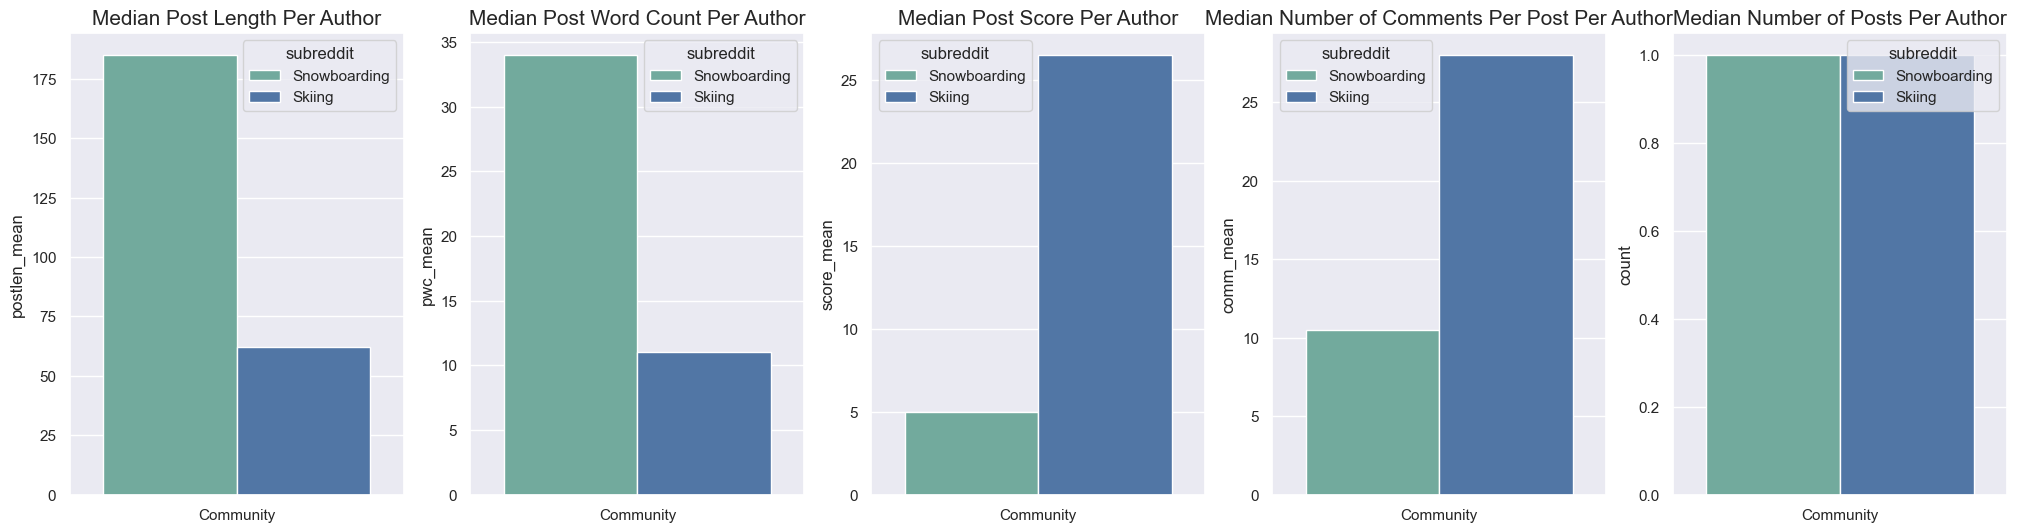

In [238]:
snow_descrip = snow_ids.describe().loc['50%'].to_frame().T #source: https://datascientyst.com/append-pandas-series-dataframe/
ski_descrip = ski_ids.describe().loc['50%'].to_frame().T

# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

snow_descrip['subreddit'] = 'Snowboarding'
ski_descrip['subreddit'] = 'Skiing'

snow_descrip['community'] = 'Community'
ski_descrip['community'] = 'Community'

descrips_med = pd.concat([snow_descrip, ski_descrip], axis=0)


# Set the figure size
#plt.figure(figsize=(3, 4))
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

# grouped barplot
ax = sns.barplot(
    x="community", 
    y="postlen_mean", 
    hue="subreddit", 
    data=descrips_med, 
    ci=None,
    ax=axs[0]
    );

ax = sns.barplot(
    x="community", 
    y="pwc_mean", 
    hue="subreddit", 
    data=descrips_med, 
    ci=None,
    ax=axs[1]
    );

ax = sns.barplot(
    x="community", 
    y="score_mean", 
    hue="subreddit", 
    data=descrips_med, 
    ci=None,
    ax=axs[2]
    );

ax = sns.barplot(
    x="community", 
    y="comm_mean", 
    hue="subreddit", 
    data=descrips_med, 
    ci=None,
    ax=axs[3]
    );

ax = sns.barplot(
    x="community", 
    y="count", 
    hue="subreddit", 
    data=descrips_med, 
    ci=None,
    ax=axs[4]
    );

axs[0].set_title('Median Post Length Per Author', fontdict={'fontsize': 15})
axs[1].set_title('Median Post Word Count Per Author', fontdict={'fontsize': 15});
axs[2].set_title('Median Post Score Per Author', fontdict={'fontsize': 15});
axs[3].set_title('Median Number of Comments Per Post Per Author', fontdict={'fontsize': 15});
axs[4].set_title('Median Number of Posts Per Author', fontdict={'fontsize': 15});

for ax in axs:
    ax.set_xlabel(None)
    
#plt.legend(bbox_to_anchor=(1.02, 0.95), loc='upper center', borderaxespad=0, title = 'Subreddit Community' ); 

##### <span style='color:blue'>_When looking at medians, we observe the same trends as when looking at means, but not to the same magnitude. Snowboarding authors are more likely to post longer messages in both number of characters and words, whereas Skiing authors are more likely to engage by upvoting posts and commenting on them._</span>